In [3]:




isrf_cube = np.genfromtxt('isrf_plane.dat', skiprows=1)

nr=81 nz=121 nE=101 r z e opt NIR CMB



In [58]:

with open('isrf_plane.dat', 'r') as f: 
    line = f.readline()
    nr, nz, nE = [int(part.split("=")[1]) for part in line.split()[:3]]
    print line
    
    

r = np.sort(np.array(list(set(isrf_cube[:,0]))))
z = np.sort(np.array(list(set(isrf_cube[:,1]))))
e = np.sort(np.array(list(set(isrf_cube[:,2]))))

opt = isrf_cube[:,3].reshape((nr,nz,nE))
NIR = isrf_cube[:,4].reshape((nr,nz,nE))
CMB = isrf_cube[:,5].reshape((nr,nz,nE))






nr=81 nz=121 nE=101 r z e opt NIR CMB



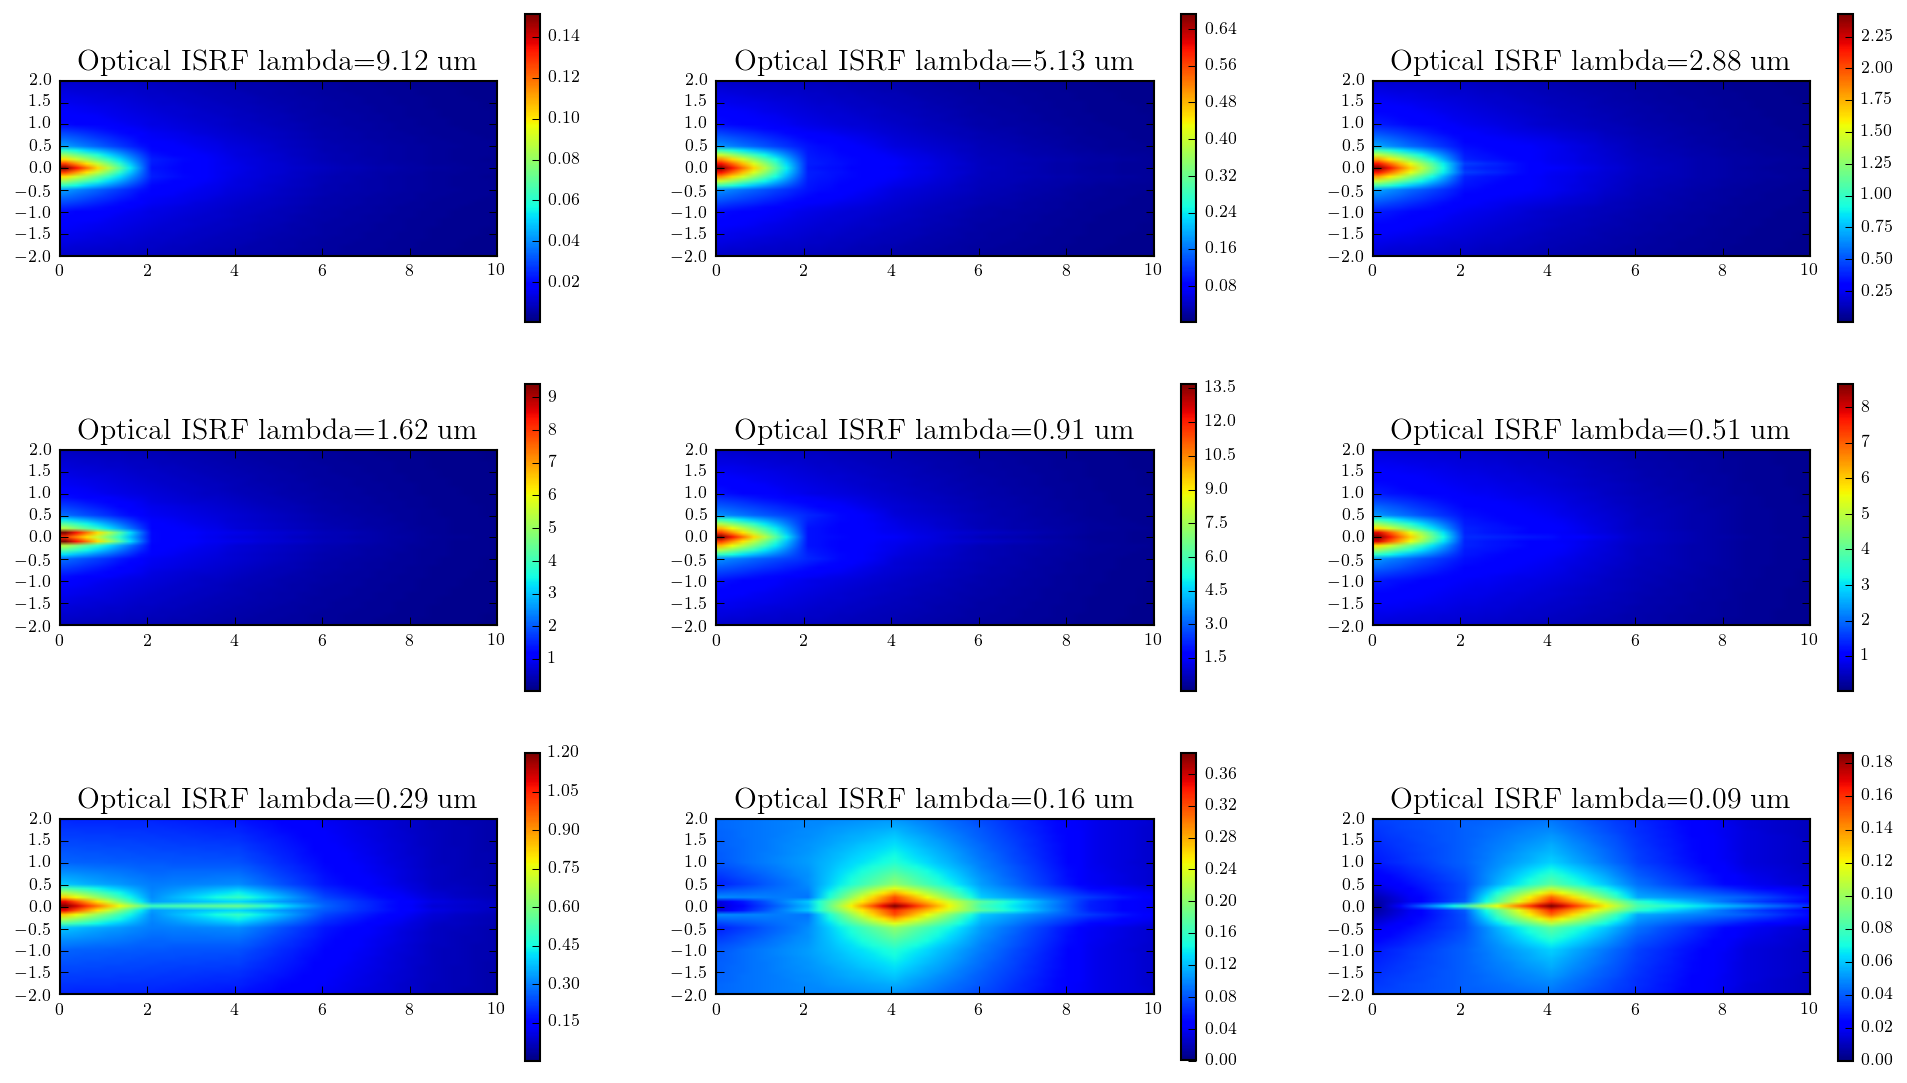

In [135]:
fig = plt.figure(figsize=(16,9))

for i, i_E in enumerate(range(60,101,5)):
    
    plt.subplot(3,3,i+1)
    
    plt.imshow((opt[:,:,i_E].T), extent=[min(r), max(r), min(z), max(z)])
    plt.colorbar()
    plt.xlim(0,10)
    plt.ylim(-2,2)
    plt.title("Optical ISRF lambda=%1.2f um"%(1240/e[i_E]/1e3))





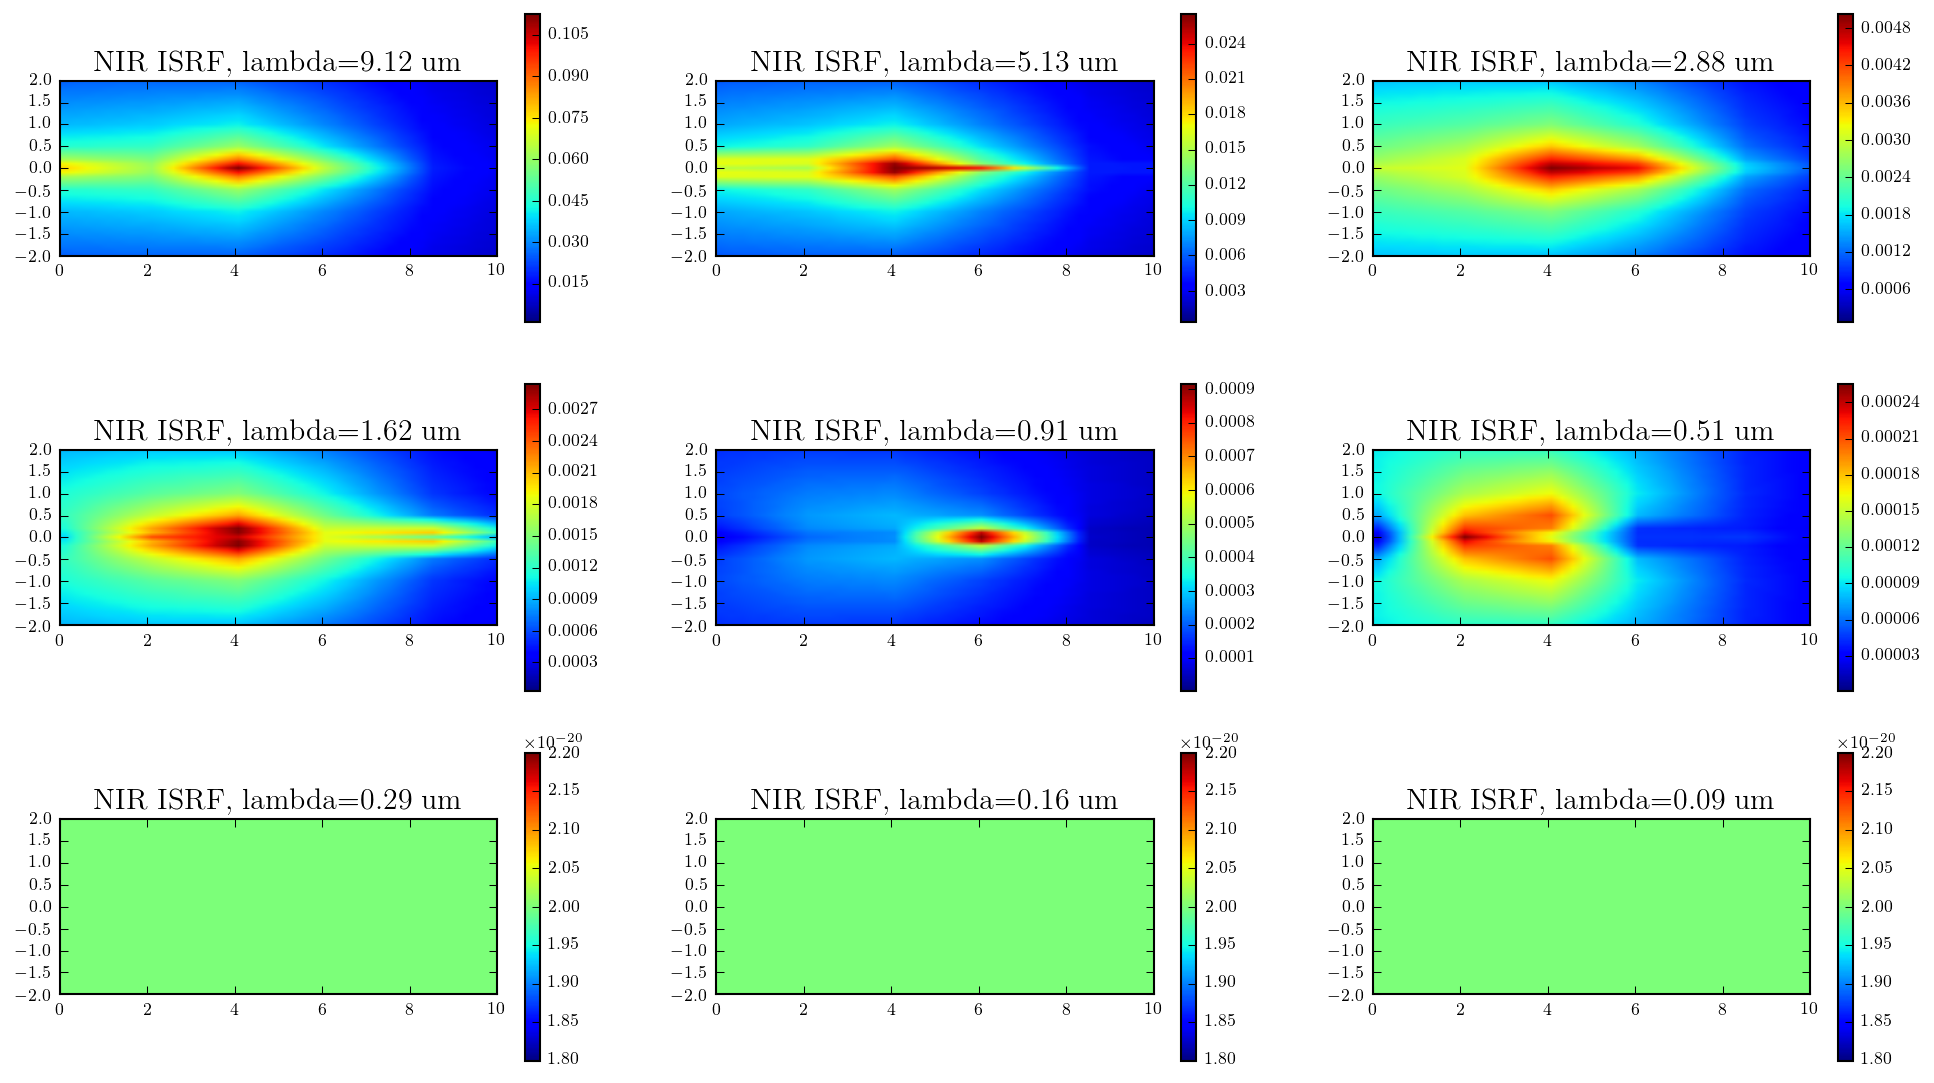

In [136]:
fig = plt.figure(figsize=(16,9))
for i, i_E in enumerate(range(60,101,5)):
    
    plt.subplot(3,3,i+1)
    
    plt.imshow((NIR[:,:,i_E].T), extent=[min(r), max(r), min(z), max(z)])
    plt.colorbar()
    plt.xlim(0,10)
    plt.ylim(-2,2)
    plt.title("NIR ISRF, lambda=%1.2f um"%(1240/e[i_E]/1e3))

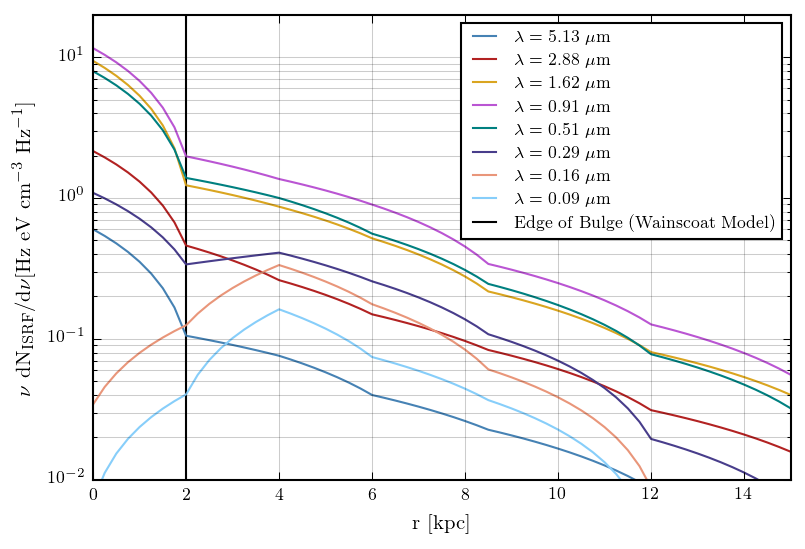

In [134]:
plt.figure(figsize=(6,4))
for i, i_E in enumerate(range(65,101,5)):
    plt.plot(r, opt[:,61,i_E], label=r"$\lambda=%1.2f\ \rm \mu m$"%(1240/e[i_E]/1e3), marker='', markersize=1, markeredgecolor=None)
    


plt.yscale('log')

plt.ylim(1e-2,2e1)
plt.xlim(0,15)

plt.xlabel('r [kpc]')
plt.ylabel(r'$\nu\ \rm dN_{\rm ISRF}/d\nu [\rm Hz\ eV\ cm^{-3}\ Hz^{-1}]$')
plt.grid(which='both', linestyle='-', alpha=.2)

plt.vlines(2, -10,100, label='Edge of Bulge (Wainscoat Model)', )

plt.legend(fontsize=8)